In [1]:
# import dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# create file path and create DataFrame from the file
path_2 = "Resources/enter_2007.csv"
df = pd.read_csv(path_2,skiprows =1)

# view the total list of columns
pd.options.display.max_columns = 100
# print(pd.options.display.max_columns)

# view first 5 rows of the data
df.head()

,Geographic identifier code,Id2,Geographic area name,2007 NAICS code,Meaning of 2007 NAICS code,Gender code,Meaning of Gender code,Ethnicity code,Meaning of Ethnicity code,Race code,Meaning of Race code,Year,Number of firms with or without paid employees,"Sales, receipts, or value of shipments of firms with or without paid employees ($1,000)",Number of firms with paid employees,"Sales, receipts, or value of shipments of firms with paid employees ($1,000)",Number of paid employees for pay period including March 12,"Annual payroll ($1,000)",Number of firms without paid employees,"Sales, receipts, or value of shipments of firms without paid employees ($1,000)",Relative standard error of number of firms with or without paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms with or without paid employees (%)",Relative standard error of number of firms with paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms with paid employees (%)",Relative standard error of number of paid employees for pay period including March 12 (%),Relative standard error of annual payroll (%),Relative standard error of number of firms without paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms without paid employees (%)"
0,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,0,All firms,2007,382350,408238540,75272,394526507,1614098,55775009,307078,13712033,0,1,1,1,1,1,1,3
1,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,30,White,2007,305324,150719683,61769,138612841,815246,24977592,243555,12106842,1,1,1,1,2,1,1,4
2,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,40,Black or African American,2007,56712,2152418,2098,1258658,16724,372545,54614,893760,1,4,6,7,10,8,1,5
3,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,50,American Indian and Alaska Native,2007,3068,650084,422,553537,5254,138712,2646,96547,8,7,14,8,11,8,11,16
4,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,60,Asian,2007,6908,2620074,2447,2391748,17993,482413,4460,228326,5,7,4,7,6,5,7,11


In [3]:
# Rename the columns for ease of use in our code
df = df.rename(columns={"Geographic area name":"State","Meaning of 2007 NAICS code":"Sector", 
                        "Meaning of Gender code":"Gender owned", "Meaning of Race code": "Race",
                         "Number of firms with or without paid employees":"Number of Firms",
                         "Sales, receipts, or value of shipments of firms with or without paid employees ($1,000)":"Total Firm Sales",
                         "Number of firms with paid employees":"Paid Emp Firms", "Sales, receipts, or value of shipments of firms with paid employees ($1,000)":"Paid Emp Sales",
                         "Annual payroll ($1,000)":"Annual Payroll", "Number of firms without paid employees":"Unpaid Emp Firms",
                         "Sales, receipts, or value of shipments of firms without paid employees ($1,000)": "Unpaid Emp Sales", "Meaning of Ethnicity code":"Ethnicity",
                        "Number of paid employees for pay period including March 12":"Total Paid Emp"
                        })
df.head()

,Geographic identifier code,Id2,State,2007 NAICS code,Sector,Gender code,Gender owned,Ethnicity code,Ethnicity,Race code,Race,Year,Number of Firms,Total Firm Sales,Paid Emp Firms,Paid Emp Sales,Total Paid Emp,Annual Payroll,Unpaid Emp Firms,Unpaid Emp Sales,Relative standard error of number of firms with or without paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms with or without paid employees (%)",Relative standard error of number of firms with paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms with paid employees (%)",Relative standard error of number of paid employees for pay period including March 12 (%),Relative standard error of annual payroll (%),Relative standard error of number of firms without paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms without paid employees (%)"
0,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,0,All firms,2007,382350,408238540,75272,394526507,1614098,55775009,307078,13712033,0,1,1,1,1,1,1,3
1,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,30,White,2007,305324,150719683,61769,138612841,815246,24977592,243555,12106842,1,1,1,1,2,1,1,4
2,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,40,Black or African American,2007,56712,2152418,2098,1258658,16724,372545,54614,893760,1,4,6,7,10,8,1,5
3,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,50,American Indian and Alaska Native,2007,3068,650084,422,553537,5254,138712,2646,96547,8,7,14,8,11,8,11,16
4,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,60,Asian,2007,6908,2620074,2447,2391748,17993,482413,4460,228326,5,7,4,7,6,5,7,11


In [4]:
firms_revenue = df[['State', 'Total Firm Sales', 'Race','Gender owned', 'Ethnicity', 'Sector']]
firms_revenue

,State,Total Firm Sales,Race,Gender owned,Ethnicity,Sector
0,Alabama,408238540,All firms,All firms,All firms,Total for all sectors
1,Alabama,150719683,White,All firms,All firms,Total for all sectors
2,Alabama,2152418,Black or African American,All firms,All firms,Total for all sectors
3,Alabama,650084,American Indian and Alaska Native,All firms,All firms,Total for all sectors
4,Alabama,2620074,Asian,All firms,All firms,Total for all sectors
5,Alabama,1285410,Asian Indian,All firms,All firms,Total for all sectors
6,Alabama,306809,Chinese,All firms,All firms,Total for all sectors
7,Alabama,92155,Filipino,All firms,All firms,Total for all sectors
8,Alabama,49158,Japanese,All firms,All firms,Total for all sectors
9,Alabama,468435,Korean,All firms,All firms,Total for all sectors


In [5]:
firms_revenue1 = firms_revenue.replace({ 'Total Firm Sales' : 'S' },np.NaN)
firms_revenue1

,State,Total Firm Sales,Race,Gender owned,Ethnicity,Sector
0,Alabama,408238540,All firms,All firms,All firms,Total for all sectors
1,Alabama,150719683,White,All firms,All firms,Total for all sectors
2,Alabama,2152418,Black or African American,All firms,All firms,Total for all sectors
3,Alabama,650084,American Indian and Alaska Native,All firms,All firms,Total for all sectors
4,Alabama,2620074,Asian,All firms,All firms,Total for all sectors
5,Alabama,1285410,Asian Indian,All firms,All firms,Total for all sectors
6,Alabama,306809,Chinese,All firms,All firms,Total for all sectors
7,Alabama,92155,Filipino,All firms,All firms,Total for all sectors
8,Alabama,49158,Japanese,All firms,All firms,Total for all sectors
9,Alabama,468435,Korean,All firms,All firms,Total for all sectors


In [6]:
firms_revenue2 = firms_revenue1.loc[(firms_revenue1['Sector'] == 'Total for all sectors') & (firms_revenue1['Race'] == 'All firms') \
                                        & (firms_revenue1['Ethnicity'] == 'All firms') & (firms_revenue1['Gender owned'] == 'All firms')]


In [7]:
firms_revenue2['Total Firm Sales'] = firms_revenue2['Total Firm Sales'].astype('int64')
Top_ten_df = firms_revenue2.sort_values(by='Total Firm Sales', ascending=False)
Top_ten_firms = Top_ten_df.head(10)
Top_ten_firms

C:\Users\tolania\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,State,Total Firm Sales,Race,Gender owned,Ethnicity,Sector
11424,California,3765938643,All firms,All firms,All firms,Total for all sectors
122808,Texas,2621467877,All firms,All firms,All firms,Total for all sectors
91392,New York,2257362689,All firms,All firms,All firms,Total for all sectors
37128,Illinois,1473210665,All firms,All firms,All firms,Total for all sectors
25704,Florida,1467083782,All firms,All firms,All firms,Total for all sectors
108528,Pennsylvania,1175703198,All firms,All firms,All firms,Total for all sectors
99960,Ohio,1114157240,All firms,All firms,All firms,Total for all sectors
85680,New Jersey,1109995739,All firms,All firms,All firms,Total for all sectors
28560,Georgia,923749405,All firms,All firms,All firms,Total for all sectors
62832,Michigan,858127515,All firms,All firms,All firms,Total for all sectors


TypeError: ticklabel_format() got an unexpected keyword argument 'color'

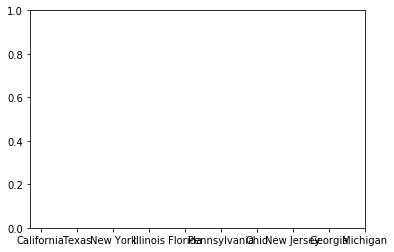

In [8]:
xpos = np.arange(len(Top_ten_firms['State']))
plt.xticks(xpos+0.3, Top_ten_firms['State'])
plt.ticklabel_format(style='plain', axis='y', color='black')

plt.ylabel('Total Firms Revenue (US$)', color='black')
# plt.xlabel('States')
plt.title('Revenue of firms per State', color='black')
plt.bar(xpos, Top_ten_firms['Total Firm Sales'], width=0.6,
        label='Total Firms Revenue', facecolor='coral')
legend = plt.legend()
plt.rcParams['figure.figsize']= (12,7)
# fig, ax = plt.subplots(facecolor='lightslategray')
plt.style.use('Solarize_Light2')
legend.get_frame().set_facecolor('grey')

In [ ]:
paid_unpaid = df[['State', 'Race','Gender owned', 'Ethnicity', 
                       'Sector', 'Paid Emp Sales', 'Unpaid Emp Sales']]
paid_unpaid.head()

In [ ]:
paid_unpaid1 = paid_unpaid.loc[(paid_unpaid['Sector'] == 'Total for all sectors') & (paid_unpaid['Race'] == 'All firms') & 
                                        (paid_unpaid['Ethnicity'] == 'All firms') & (paid_unpaid['Gender owned'] == 'All firms')]
# Plot_ten_states9

In [ ]:
paid_unpaid1['Unpaid Emp Sales'] = paid_unpaid1['Unpaid Emp Sales'].astype('int64')
paid_unpaid1['Paid Emp Sales'] = paid_unpaid1['Paid Emp Sales'].astype('int64')
Top_ten_emp_df = paid_unpaid1.sort_values(by=('Paid Emp Sales'), ascending=False)
# Top_ten_main = Top_ten_df.head(10)
# Top_ten_main
Top_ten_emp = Top_ten_emp_df.head(10)
Top_ten_emp

In [ ]:
xpos = np.arange(len(Top_ten_emp['State']))
plt.xticks(xpos+0.2, Top_ten_emp['State'])
plt.ticklabel_format(style='plain', axis='y', color='black')

plt.bar(xpos, Top_ten_emp['Paid Emp Sales'], width=0.4,
        label='Paid Employee Revenue', facecolor='coral', align='center')
plt.bar(xpos+0.4, Top_ten_emp['Unpaid Emp Sales'], width=0.4,
        label='Unpaid Employee Revenue', facecolor='lightskyblue', align='center')

plt.title('Revenue of Businesses(Paid vs Unpaid employment) per State', color='black')
plt.ylabel('Revenue (US$)', color='black')

legend = plt.legend()
plt.rcParams['figure.figsize']= (12,7)
plt.style.use('Solarize_Light2')
legend.get_frame().set_facecolor('grey')

In [ ]:
avg_income = df[['State', 'Race','Gender owned', 'Ethnicity', 
                       'Sector', 'Total Paid Emp', 'Annual Payroll']]
avg_income.head()

In [ ]:
avg_income = avg_income.replace({ 'Total Paid Emp' :
                                               ['a','b', 'c', 'e', 'f', 'g', 'h', 'i','S']},np.NaN)
avg_income = avg_income.replace({ 'Annual Payroll' : ['S','D'] },np.NaN)
avg_income = avg_income.replace({ 'Total Paid Emp' : np.NaN },0)
avg_income = avg_income.replace({ 'Annual Payroll' : np.NaN },0)


avg_income['Total Paid Emp'] = avg_income['Total Paid Emp'].astype('int64')
avg_income['Annual Payroll'] = avg_income['Annual Payroll'].astype('int64')

In [ ]:
avg_income['Avg Income'] = avg_income['Annual Payroll']/avg_income['Total Paid Emp']

In [ ]:
avg_income

In [ ]:
avg_income1 = avg_income.loc[(avg_income['Sector'] == 'Total for all sectors') & (avg_income['Race'] == 'All firms')
                                        & (avg_income['Ethnicity'] == 'All firms') & (avg_income['Gender owned'] == 'All firms')]


In [ ]:
Top_ten_avg_df = avg_income1.sort_values(by=('Avg Income'), ascending=False)
Top_ten_avg = Top_ten_avg_df.head(10)
Top_ten_avg

In [ ]:
xpos = np.arange(len(Top_ten_avg['State']))
plt.xticks(xpos+0.25, Top_ten_avg['State'])
plt.ticklabel_format(style='plain', axis='y', color='black')

plt.ylabel('Average Yearly Employee Income (US$, Thousands)', color='black')
# plt.xlabel('States')
plt.title('Annual Average Employee Income per State', color='black')
plt.bar(xpos, Top_ten_avg['Avg Income'], width=0.5,
        label='Average Income per state', facecolor='coral')
legend = plt.legend()
plt.rcParams['figure.figsize']= (13,8)
# fig, ax = plt.subplots(facecolor='lightslategray')
plt.style.use('Solarize_Light2')
legend.get_frame().set_facecolor('grey')

In [ ]:
Male_Female = ['Male-owned', 'Female-owned']
avg_income2 = avg_income.loc[(avg_income['Sector'] == 'Total for all sectors') & (avg_income['Race'] == 'All firms')
                                        & (avg_income['Ethnicity'] == 'All firms') & (avg_income['Gender owned'].isin(Male_Female))]


In [ ]:
StatesMF = ['District of Columbia', 'New York', 'Connecticut', 'Massachusetts', 'New Jersey',
            'California', 'Delaware', 'Maryland', 'Washington', 'Illinois']
Top_ten_avgMF = avg_income2.loc[(avg_income2['State'].isin(StatesMF))]


In [ ]:
Top_ten_avgMF_o = Top_ten_avgMF[['State', 'Gender owned', 'Avg Income']]
Top_ten_avgMF_n = Top_ten_avgMF_o.pivot(index = 'State', columns = 'Gender owned')
Top_ten_avgMF_n

In [ ]:
Top_ten_avgMF_m = pd.DataFrame(Top_ten_avgMF_n.to_records())

Top_ten_avgMF_m


In [ ]:
Top_ten_avgMF_m.columns = [hdr.replace("('Avg Income', '", "" ).replace("')", "") \
                           for hdr in Top_ten_avgMF_m.columns]

Top_ten_avgMF_m

In [ ]:
xpos = np.arange(len(Top_ten_avgMF_m['State']))
plt.xticks(xpos+0.2, Top_ten_avgMF_m['State'])
plt.ticklabel_format(style='plain', axis='y', color='black')

plt.bar(xpos, Top_ten_avgMF_m['Male-owned'],width=0.4,
        label='Male owned', facecolor='lightskyblue', align='center')
plt.bar(xpos+0.4, Top_ten_avgMF_m['Female-owned'], width=0.4,
        label='Female owned', facecolor='coral', align='center')

plt.title('Revenue of Busnesses(Paid vs Unpaid employment) per State', color='black')
plt.ylabel('Average Yearly Employee Income (US$, Thousands)', color='black')

legend = plt.legend()
plt.rcParams['figure.figsize']= (13,9)
plt.style.use('Solarize_Light2')
legend.get_frame().set_facecolor('grey')

In [9]:
#state, sector, gender owned, race,ethinicity
df_new=df[['State','Sector','Gender owned','Race', 'Ethnicity','Number of Firms']]
df_new.convert_objects(convert_numeric=True)
type(df_new)
#df_a=df_new.drop(['Industries not classified','Mining, quarrying, and oil and gas extraction'], level=0)

C:\Users\tolania\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


pandas.core.frame.DataFrame

In [10]:
df_b= df_new.loc[(df_new['Sector']=='Total for all sectors') &  (df_new['Race']=='All firms') &(df_new['Gender owned']=='All firms') & (df_new['Ethnicity']=='All firms')]
df_b['Number of Firms']=pd.to_numeric(df_b['Number of Firms'])
df_b=df_b.sort_values('Number of Firms', ascending= False)
df_b

C:\Users\tolania\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,State,Sector,Gender owned,Race,Ethnicity,Number of Firms
11424,California,Total for all sectors,All firms,All firms,All firms,3425510
122808,Texas,Total for all sectors,All firms,All firms,All firms,2164852
25704,Florida,Total for all sectors,All firms,All firms,All firms,2009589
91392,New York,Total for all sectors,All firms,All firms,All firms,1956733
37128,Illinois,Total for all sectors,All firms,All firms,All firms,1123817
108528,Pennsylvania,Total for all sectors,All firms,All firms,All firms,981501
28560,Georgia,Total for all sectors,All firms,All firms,All firms,901105
99960,Ohio,Total for all sectors,All firms,All firms,All firms,897939
62832,Michigan,Total for all sectors,All firms,All firms,All firms,816972
94248,North Carolina,Total for all sectors,All firms,All firms,All firms,798791


In [11]:
df_d= df_new.loc[(df_new['Sector']!='Total for all sectors')  &  (df_new['Race']=='All firms') &(df_new['Gender owned']=='All firms') & (df_new['Ethnicity']=='All firms')]
#df_new['Number of Firms']= df_new['Number of Firms'].astype(int)
#df_d=df_d.sort_values('Firms', ascending= False)
df_d['Number of Firms']=pd.to_numeric(df_d['Number of Firms'],errors='coerce')
df_e=df_d.pivot_table(index=['State','Sector'], values =['Number of Firms'],aggfunc=max)

#df_f=df_e.drop(index=['Industries not classified','Mining, quarrying, and oil and gas extraction'], level=1)
df_e

# maxim =0
# for index,row in df_e.iterrows():
#     if  df_new['Firms'] > maxim:
#          df_new['Firms']=maxim
#     print(index, row['Firms'])


C:\Users\tolania\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Number of Firms
State     Sector                                                             
Alabama   Accommodation and food services                              9531.0
          Administrative and support and waste management...          37938.0
          Agriculture, forestry, fishing and hunting(601)              5417.0
          Arts, entertainment, and recreation                         11721.0
          Construction                                                61691.0
          Educational services                                         6883.0
          Finance and insurance(604)                                  12065.0
          Health care and social assistance                           26292.0
          Industries not classified                                      93.0
          Information                                                  3485.0
          Management of companies and enterprises                       437.0
          Manufacturing                                                8848.0
          Mining, quarrying, and oil and gas extraction                 912.0
          Other services (except public administration)(605)          55813.0
          Professional, scientific, and technical services            39944.0
          Real estate and rental and leasing                          32490.0
          Retail trade                                                41627.0
          Transportation and warehousing(603)                         17992.0
          Utilities                                                     430.0
          Wholesale trade                                              9930.0
Alaska    Accommodation and food services                              3308.0
          Administrative and support and waste management...           4188.0
          Agriculture, forestry, fishing and hunting(601)              9481.0
          Arts, entertainment, and recreation                          3344.0
          Construction                                                 7576.0
          Educational services                                         1924.0
          Finance and insurance(604)                                   1143.0
          Health care and social assistance                            5913.0
          Industries not classified                                       5.0
          Information                                                   677.0
...                                                                       ...
Wisconsin Information                                                  4954.0
          Management of companies and enterprises                       601.0
          Manufacturing                                               15702.0
          Mining, quarrying, and oil and gas extraction                 239.0
          Other services (except public administration)(605)          47908.0
          Professional, scientific, and technical services            51417.0
          Real estate and rental and leasing                          36195.0
          Retail trade                                                55457.0
          Transportation and warehousing(603)                         19241.0
          Utilities                                                     319.0
          Wholesale trade                                             12629.0
Wyoming   Accommodation and food services                              2087.0
          Administrative and support and waste management...           4041.0
          Agriculture, forestry, fishing and hunting(601)              1381.0
          Arts, entertainment, and recreation                          2820.0
          Construction                                                 8545.0
          Educational services                                         1138.0
          Finance and insurance(604)                                   1877.0
          Health care and social assistance                            5192.0
      

In [12]:
df_e.loc["Alabama"].loc["Construction"]


Number of Firms    61691.0
Name: Construction, dtype: float64

In [13]:
dfw = df_e[df_e['Number of Firms'] == df_e.groupby(['State'])['Number of Firms'].transform(max)]
dfw

,,Number of Firms
State,Sector,
Alabama,Construction,61691.0
Alaska,"Agriculture, forestry, fishing and hunting(601)",9481.0
Arizona,"Professional, scientific, and technical services",73321.0
Arkansas,Construction,41882.0
California,"Professional, scientific, and technical services",579994.0
Colorado,"Professional, scientific, and technical services",93162.0
Connecticut,"Professional, scientific, and technical services",54472.0
Delaware,Construction,10040.0
District of Columbia,"Professional, scientific, and technical services",16624.0


In [14]:
dfz = df_d[df_d['Number of Firms'] == df_d.groupby(['State'])['Number of Firms'].transform(max)]
dfz=dfz.sort_values('Number of Firms', ascending= False)
dfz


,State,Sector,Gender owned,Race,Ethnicity,Number of Firms
13056,California,"Professional, scientific, and technical services",All firms,All firms,All firms,579994.0
123352,Texas,Construction,All firms,All firms,All firms,306793.0
93024,New York,"Professional, scientific, and technical services",All firms,All firms,All firms,286185.0
27336,Florida,"Professional, scientific, and technical services",All firms,All firms,All firms,261537.0
38760,Illinois,"Professional, scientific, and technical services",All firms,All firms,All firms,156297.0
110160,Pennsylvania,"Professional, scientific, and technical services",All firms,All firms,All firms,139700.0
87312,New Jersey,"Professional, scientific, and technical services",All firms,All firms,All firms,134180.0
29104,Georgia,Construction,All firms,All firms,All firms,131337.0
94792,North Carolina,Construction,All firms,All firms,All firms,127515.0
100504,Ohio,Construction,All firms,All firms,All firms,121044.0


In [15]:
# Identify the top ten states where we have entrepreneurs and Identify the top ten sectors, 
#then group the sector by states and see if there is a story there.
# select the top 10 states by entre
df2=df.loc[df[''] & (df['Sector']=='Total for all sectors'),
#.groupby('Number of firms with or without paid employees')
#& df ['Number of firms with or without paid employees']& df['Geographic area name']
#&(df['Meaning of 2012 NAICS code']=="Total for all sectors")
df2

SyntaxError: unexpected EOF while parsing (<ipython-input-15-f24d069e0ce8>, line 8)

In [16]:
# Identify the top ten states based on population and total number of revenue by states
states= ["California", "Texas", "Florida", "New York", "Pennsylvania", "Illinois", "Ohio", "Georgia", "North Carolina", "Michigan"]

In [17]:
df_race= df_new.loc[(df_new['Sector']=='Total for all sectors')  &  (df_new['Race']!='All firms') &(df_new['Gender owned']=='All firms') & (df_new['Ethnicity']=='All firms')]
df_race['Number of Firms']=pd.to_numeric(df_race['Number of Firms'],errors='coerce')
dfzr = df_race[df_race['Race'] == df_race.groupby(['State'])['Race'].transform(max)]
dfzr=dfzr.sort_values('Number of Firms', ascending= False)
dfzr

C:\Users\tolania\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,State,Sector,Gender owned,Race,Ethnicity,Number of Firms
11425,California,Total for all sectors,All firms,White,All firms,2619169.0
122809,Texas,Total for all sectors,All firms,White,All firms,1822440.0
25705,Florida,Total for all sectors,All firms,White,All firms,1695027.0
91393,New York,Total for all sectors,All firms,White,All firms,1493356.0
37129,Illinois,Total for all sectors,All firms,White,All firms,914143.0
108529,Pennsylvania,Total for all sectors,All firms,White,All firms,874462.0
99961,Ohio,Total for all sectors,All firms,White,All firms,796538.0
62833,Michigan,Total for all sectors,All firms,White,All firms,693405.0
94249,North Carolina,Total for all sectors,All firms,White,All firms,659377.0
28561,Georgia,Total for all sectors,All firms,White,All firms,641939.0


In [18]:
df_race= df_new.loc[(df_new['Sector']!='Total for all sectors')  &  (df_new['Race']!='All firms') &(df_new['Gender owned']=='All firms') & (df_new['Ethnicity']=='All firms')]
df_race['Number of Firms']=pd.to_numeric(df_race['Number of Firms'],errors='coerce')
dfzr = df_race[df_race['Race'] == df_race.groupby(['State'])['Race'].transform(max)]
dfzr=dfzr.sort_values('Number of Firms', ascending= False)
dfzr

C:\Users\tolania\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,State,Sector,Gender owned,Race,Ethnicity,Number of Firms
13057,California,"Professional, scientific, and technical services",All firms,White,All firms,466610.0
14009,California,Other services (except public administration)(...,All firms,White,All firms,288604.0
123353,Texas,Construction,All firms,White,All firms,287784.0
11969,California,Construction,All firms,White,All firms,260902.0
12921,California,Real estate and rental and leasing,All firms,White,All firms,257517.0
124441,Texas,"Professional, scientific, and technical services",All firms,White,All firms,244392.0
93025,New York,"Professional, scientific, and technical services",All firms,White,All firms,242738.0
27337,Florida,"Professional, scientific, and technical services",All firms,White,All firms,236100.0
12377,California,Retail trade,All firms,White,All firms,227411.0
13601,California,Health care and social assistance,All firms,White,All firms,224976.0


In [19]:
#df_gen= df_new.loc[(df_new['Sector']=='Total for all sectors')  &  (df_new['Race']=='All firms')  & (df_new['Ethnicity']=='All firms')&(df_new['Gender owned']!='All firms classifiable by gender, ethnicity, race, and veteran status') |(df_new['Gender owned']!='Publicly held and other firms not classifiable by gender, ethnicity, race, and veteran status')]
df_gen= df_new.loc[(df_new['Sector']=='Total for all sectors')  &  (df_new['Race']=='All firms')  & (df_new['Ethnicity']=='All firms')&(df_new['Gender owned']=='Female-owned') |(df_new['Gender owned']=='Male-owned')]

df_gen['Number of Firms']=pd.to_numeric(df_gen['Number of Firms'],errors='coerce')
#df_gent=df_gen['Gender owned']
#loc['Publicly held and other firms not classifiable by gender, ethnicity, race, and veteran status','All firms classifiable by gender, ethnicity, race, and veteran status']
#.drop(['Publicly held and other firms not classifiable by gender, ethnicity, race, and veteran status','All firms classifiable by gender, ethnicity, race, and veteran status'],axis=0)
df_gen=df_gen.groupby(["State",'Gender owned']).agg({"Number of Firms": "max"})
df_gen=df_gen.sort_values('Number of Firms', ascending= False)
#dfzg
df_gen


C:\Users\tolania\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,,Number of Firms
State,Gender owned,
California,Male-owned,1685826.0
New York,Male-owned,1110075.0
Texas,Male-owned,1090854.0
California,Female-owned,1039208.0
Florida,Male-owned,1036446.0
Texas,Female-owned,609947.0
New York,Female-owned,594517.0
Florida,Female-owned,581096.0
Illinois,Male-owned,578656.0
